## Observations and Insights 

In [53]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_file=pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_file.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.00,0
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1


In [54]:
# Checking the number of mice in the DataFrame.
Number_of_Mice=combined_file["Mouse ID"].nunique()
Number_of_Mice

249

In [55]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#convert timepoint to string
combined_file["Timepoint"]=combined_file["Timepoint"].astype(str)
#concat timepoint and mouseID
combined_file["MouseID & Timepoint"]=combined_file["Mouse ID"].str.cat(combined_file["Timepoint"],sep="")
DuplicateMouse= combined_file[combined_file.duplicated(["MouseID & Timepoint"])]
DuplicateMouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
909,g989,Propriva,Female,21,26,0,45.00,0,g9890
911,g989,Propriva,Female,21,26,5,47.57,0,g9895
913,g989,Propriva,Female,21,26,10,49.88,0,g98910
915,g989,Propriva,Female,21,26,15,53.44,0,g98915
917,g989,Propriva,Female,21,26,20,54.66,1,g98920


In [56]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse = combined_file[combined_file.duplicated(subset=["Mouse ID","Timepoint"], keep=False)]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
908,g989,Propriva,Female,21,26,0,45.00,0,g9890
909,g989,Propriva,Female,21,26,0,45.00,0,g9890
910,g989,Propriva,Female,21,26,5,48.79,0,g9895
911,g989,Propriva,Female,21,26,5,47.57,0,g9895
912,g989,Propriva,Female,21,26,10,51.75,0,g98910
913,g989,Propriva,Female,21,26,10,49.88,0,g98910
914,g989,Propriva,Female,21,26,15,51.33,1,g98915
915,g989,Propriva,Female,21,26,15,53.44,0,g98915
916,g989,Propriva,Female,21,26,20,55.33,1,g98920
917,g989,Propriva,Female,21,26,20,54.66,1,g98920


In [57]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newtable = combined_file.drop_duplicates(subset=["Mouse ID","Timepoint"], keep=False)
newtable.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
0,k403,Ramicane,Male,21,16,0,45.00,0,k4030
1,k403,Ramicane,Male,21,16,5,38.83,0,k4035
2,k403,Ramicane,Male,21,16,10,35.01,1,k40310
3,k403,Ramicane,Male,21,16,15,34.22,1,k40315
4,k403,Ramicane,Male,21,16,20,33.00,1,k40320


In [58]:
# Checking the number of mice in the clean DataFrame.
New_Number_of_Mice=newtable["Mouse ID"].nunique()
New_Number_of_Mice

249

## Summary Statistics

In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#find out what are the drug regimens

#Capomulin
only_Capomulin = newtable.loc[newtable["Drug Regimen"] == "Capomulin", :]
Capomulin_mean=only_Capomulin["Tumor Volume (mm3)"].mean()
Capomulin_median=only_Capomulin["Tumor Volume (mm3)"].median()
Capomulin_variance=only_Capomulin["Tumor Volume (mm3)"].var()
Capomulin_Stdev=only_Capomulin["Tumor Volume (mm3)"].std()
Capomulin_SEM=only_Capomulin["Tumor Volume (mm3)"].sem()

#Ceftamin
only_Ceftamin = newtable.loc[newtable["Drug Regimen"] == "Ceftamin", :]
Ceftamin_mean=only_Ceftamin["Tumor Volume (mm3)"].mean()
Ceftamin_median=only_Ceftamin["Tumor Volume (mm3)"].median()
Ceftamin_variance=only_Ceftamin["Tumor Volume (mm3)"].var()
Ceftamin_Stdev=only_Ceftamin["Tumor Volume (mm3)"].std()
Ceftamin_SEM=only_Ceftamin["Tumor Volume (mm3)"].sem()

#Infubinol
only_Infubinol = newtable.loc[newtable["Drug Regimen"] == "Infubinol", :]
Infubinol_mean=only_Infubinol["Tumor Volume (mm3)"].mean()
Infubinol_median=only_Infubinol["Tumor Volume (mm3)"].median()
Infubinol_variance=only_Infubinol["Tumor Volume (mm3)"].var()
Infubinol_Stdev=only_Infubinol["Tumor Volume (mm3)"].std()
Infubinol_SEM=only_Infubinol["Tumor Volume (mm3)"].sem()

#Ketapril
only_Ketapril = newtable.loc[newtable["Drug Regimen"] == "Ketapril", :]
Ketapril_mean=only_Ketapril["Tumor Volume (mm3)"].mean()
Ketapril_median=only_Ketapril["Tumor Volume (mm3)"].median()
Ketapril_variance=only_Ketapril["Tumor Volume (mm3)"].var()
Ketapril_Stdev=only_Ketapril["Tumor Volume (mm3)"].std()
Ketapril_SEM=only_Ketapril["Tumor Volume (mm3)"].sem()

#Naftisol
only_Naftisol = newtable.loc[newtable["Drug Regimen"] == "Naftisol", :]
Naftisol_mean=only_Naftisol["Tumor Volume (mm3)"].mean()
Naftisol_median=only_Naftisol["Tumor Volume (mm3)"].median()
Naftisol_variance=only_Naftisol["Tumor Volume (mm3)"].var()
Naftisol_Stdev=only_Naftisol["Tumor Volume (mm3)"].std()
Naftisol_SEM=only_Naftisol["Tumor Volume (mm3)"].sem()

#Placebo
only_Placebo = newtable.loc[newtable["Drug Regimen"] == "Placebo", :]
Placebo_mean=only_Placebo["Tumor Volume (mm3)"].mean()
Placebo_median=only_Placebo["Tumor Volume (mm3)"].median()
Placebo_variance=only_Placebo["Tumor Volume (mm3)"].var()
Placebo_Stdev=only_Placebo["Tumor Volume (mm3)"].std()
Placebo_SEM=only_Placebo["Tumor Volume (mm3)"].sem()

#Propriva
only_Propriva = newtable.loc[newtable["Drug Regimen"] == "Propriva", :]
Propriva_mean=only_Propriva["Tumor Volume (mm3)"].mean()
Propriva_median=only_Propriva["Tumor Volume (mm3)"].median()
Propriva_variance=only_Propriva["Tumor Volume (mm3)"].var()
Propriva_Stdev=only_Propriva["Tumor Volume (mm3)"].std()
Propriva_SEM=only_Propriva["Tumor Volume (mm3)"].sem()

#Ramicane
only_Ramicane = newtable.loc[newtable["Drug Regimen"] == "Ramicane", :]
Ramicane_mean=only_Ramicane["Tumor Volume (mm3)"].mean()
Ramicane_median=only_Ramicane["Tumor Volume (mm3)"].median()
Ramicane_variance=only_Ramicane["Tumor Volume (mm3)"].var()
Ramicane_Stdev=only_Ramicane["Tumor Volume (mm3)"].std()
Ramicane_SEM=only_Ramicane["Tumor Volume (mm3)"].sem()

#Stelasyn
only_Stelasyn = newtable.loc[newtable["Drug Regimen"] == "Stelasyn", :]
Stelasyn_mean=only_Stelasyn["Tumor Volume (mm3)"].mean()
Stelasyn_median=only_Stelasyn["Tumor Volume (mm3)"].median()
Stelasyn_variance=only_Stelasyn["Tumor Volume (mm3)"].var()
Stelasyn_Stdev=only_Stelasyn["Tumor Volume (mm3)"].std()
Stelasyn_SEM=only_Stelasyn["Tumor Volume (mm3)"].sem()

#Zoniferol
only_Zoniferol = newtable.loc[newtable["Drug Regimen"] == "Zoniferol", :]
Zoniferol_mean=only_Zoniferol["Tumor Volume (mm3)"].mean()
Zoniferol_median=only_Zoniferol["Tumor Volume (mm3)"].median()
Zoniferol_variance=only_Zoniferol["Tumor Volume (mm3)"].var()
Zoniferol_Stdev=only_Zoniferol["Tumor Volume (mm3)"].std()
Zoniferol_SEM=only_Zoniferol["Tumor Volume (mm3)"].sem()
 
#summary
summary1=pd.DataFrame({
    "name":["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"],
    "mean":[Capomulin_mean,Ceftamin_mean,Infubinol_mean,Ketapril_mean,Naftisol_mean,Placebo_mean,Propriva_mean,Ramicane_mean,Stelasyn_mean,Zoniferol_mean],
    "median":[Capomulin_median,Ceftamin_median,Infubinol_median,Ketapril_median,Naftisol_median,Placebo_median,Propriva_median,Ramicane_median,Stelasyn_median,Zoniferol_median],
    "variance":[Capomulin_variance,Ceftamin_variance,Infubinol_variance,Ketapril_variance,Naftisol_variance,Placebo_variance,Propriva_variance,Ramicane_variance,Stelasyn_variance,Zoniferol_variance],
    "standard deviation":[Capomulin_Stdev,Ceftamin_Stdev,Infubinol_Stdev,Ketapril_Stdev,Naftisol_Stdev,Placebo_Stdev,Propriva_Stdev,Ramicane_Stdev,Stelasyn_Stdev,Zoniferol_Stdev],
    "SEM":[Capomulin_SEM,Ceftamin_SEM,Infubinol_SEM,Ketapril_SEM,Naftisol_SEM,Placebo_SEM,Propriva_SEM,Ramicane_SEM,Stelasyn_SEM,Zoniferol_SEM]})
summary2=summary1.set_index("name")
summary2


#
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,mean,median,variance,standard deviation,SEM
name,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regime
mean=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
Stdev=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM=newtable.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary=pd.DataFrame({"mean":pd.Series(mean),
                        "median":pd.Series(median),
                        "variance":pd.Series(variance),
                        "Standard deviation":pd.Series(Stdev),
                         "SEM":pd.Series(SEM)})
pd.options.display.float_format = '{:.2f}'.format
summary
# This method produces everything in a single groupby function.

,mean,median,variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.46,50.85,44.05,6.64,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar Plots

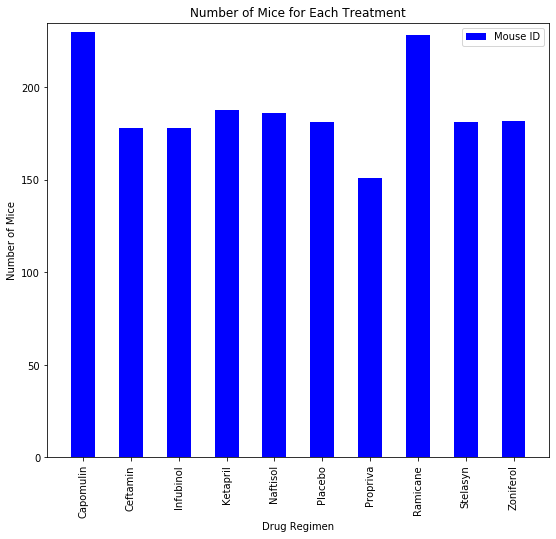

In [61]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#y axis
total_mice=newtable.groupby("Drug Regimen")["Mouse ID"].count()
#x axis and conver to interger
x_axis= newtable["Drug Regimen"].unique()
total_mice=total_mice.astype(int)
#plot
total_mice_chart=total_mice.plot(kind="bar", figsize=(9,8),color='b', title="Number of Mice for Each Treatment",width=0.5,legend=True)
#format 
total_mice_chart.set_xlabel("Drug Regimen")
total_mice_chart.set_ylabel("Number of Mice")
total_mice_chart.set_xlim(-0.75, len(x_axis)-0.25)
total_mice_chart.set_ylim(0, max(total_mice)+5)
total_mice_chart

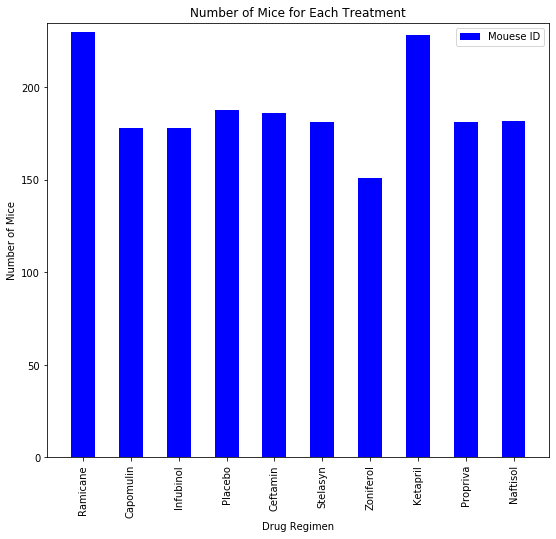

In [62]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#set x axis and tick locations 
x_axis= newtable["Drug Regimen"].unique()
tick_locations = [value for value in x_axis]
#set y axis
total_mice1=newtable.groupby("Drug Regimen")["Mouse ID"].count()
#plot
plt.figure(figsize=(9,8))
plt.bar(x_axis,total_mice1 , color='b', align="center",label="Mouese ID",width=0.5)
#format
plt.xticks(tick_locations,x_axis, rotation=90)
plt.legend(loc="upper right")
plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total_mice1)+5)
plt.show()


## Pie Plots

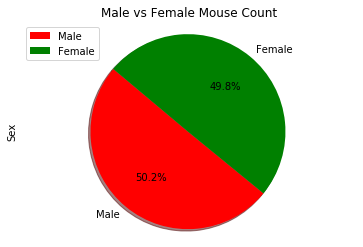

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#calcuate male and female
gender=newtable["Sex"].unique()
data=(newtable.groupby("Mouse ID")["Sex"].unique()).value_counts()
color=["Red","Green"]
#plot pie graph
pie_chart=data.plot(kind='pie',autopct='%1.1f%%',shadow=True, startangle=140, title="Male vs Female Mouse Count",labels=gender,legend=True,colors=color)
pie_chart.axis("equal")

pie_chart

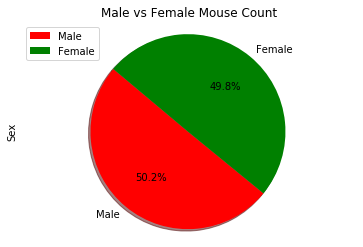

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=newtable["Sex"].unique()

plt.pie(data,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=140,colors=color)
plt.title("Male vs Female Mouse Count")
plt.axis("equal")
plt.ylabel("Sex")
plt.legend(labels,loc="upper left")
plt.show()



## Quartiles, Outliers and Boxplots

In [169]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.  Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomlin
Capomulin_Table = newtable.loc[newtable["Drug Regimen"] == "Capomulin", :]
sortby_TimePoint = Capomulin_Table.sort_values(by="Timepoint", ascending=False)
pd.to_numeric(sortby_TimePoint["Timepoint"])
Cfinaltable=sortby_TimePoint.drop_duplicates("Mouse ID")
Capomlin_Final_Tumor_Volume=Cfinaltable["Tumor Volume (mm3)"].sum()
Capomlin_Quarteriles=pd.DataFrame(Cfinaltable["Tumor Volume (mm3)"].quantile([.25,.5,.75]))
CQ1=Cfinaltable["Tumor Volume (mm3)"].quantile(0.25)
CQ3=Cfinaltable["Tumor Volume (mm3)"].quantile(0.75)
CIQR=CQ3-CQ1
C_lower_bound = CQ1 - (1.5*CIQR)
C_upper_bound = CQ3 + (1.5*CIQR)
print(f"The final tumor volume for Capomlin is: {round(Capomlin_Final_Tumor_Volume,2)}")
print(f"The quartile of  tumor volume for Capomlin is: {Capomlin_Quarteriles}")
print(f"The interquartile range of tumor volume for Capomlin is: {round(CIQR,2)}")

outlier_Capomlin = Cfinaltable.loc[(Cfinaltable["Timepoint"] < C_lower_bound) | (Cfinaltable["Timepoint"] > C_upper_bound)]
outlier_Capomlin

The final tumor volume for Capomlin is: 916.69
The quartile of  tumor volume for Capomlin is:       Tumor Volume (mm3)
0.25               32.38
0.50               38.13
0.75               40.16
The interquartile range of tumor volume for Capomlin is: 7.78


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
64,f966,Capomulin,Male,16,17,20,30.49,0,f96620
1455,r157,Capomulin,Male,22,25,15,46.54,0,r15715
340,w150,Capomulin,Male,23,23,10,39.95,0,w15010


In [170]:
#Ramicane
Ramicane_Table = newtable.loc[newtable["Drug Regimen"] == "Ramicane", :]
sortby_TimePoint1 = Ramicane_Table.sort_values(by="Timepoint", ascending=False)
pd.to_numeric(sortby_TimePoint1["Timepoint"])
Rfinaltable=sortby_TimePoint1.drop_duplicates("Mouse ID")
Ramicane_Final_Tumor_Volume=Rfinaltable["Tumor Volume (mm3)"].sum()
Ramicane_Quarteriles=pd.DataFrame(Rfinaltable["Tumor Volume (mm3)"].quantile([.25,.5,.75]))
RQ1=Rfinaltable["Tumor Volume (mm3)"].quantile(0.25)
RQ3=Rfinaltable["Tumor Volume (mm3)"].quantile(0.75)
RIQR=RQ3-RQ1
R_lower_bound = RQ1 - (1.5*RIQR)
R_upper_bound = RQ3 + (1.5*RIQR)
print(f"The final tumor volume for Ramicane is: {round(Ramicane_Final_Tumor_Volume,2)}")
print(f"The quartile of  tumor volume for Ramicane is: {Ramicane_Quarteriles}")
print(f"The interquartile range of tumor volume for Ramicane is: {round(RIQR,2)}")

outlier_Ramicane = Rfinaltable.loc[(Rfinaltable["Timepoint"] < R_lower_bound) | (Rfinaltable["Timepoint"] > R_upper_bound)]
outlier_Ramicane

The final tumor volume for Ramicane is: 904.78
The quartile of  tumor volume for Ramicane is:       Tumor Volume (mm3)
0.25               31.56
0.50               36.56
0.75               40.66
The interquartile range of tumor volume for Ramicane is: 9.1


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
453,y449,Ramicane,Male,19,24,15,44.18,0,y44915
449,w678,Ramicane,Female,5,24,5,43.17,0,w6785


In [172]:
#Infubinol
Infubinol_Table = newtable.loc[newtable["Drug Regimen"] == "Infubinol", :]
sortby_TimePoint2 = Infubinol_Table.sort_values(by="Timepoint", ascending=False)
pd.to_numeric(sortby_TimePoint2["Timepoint"])
Ifinaltable=sortby_TimePoint2.drop_duplicates("Mouse ID")
Infubinol_Final_Tumor_Volume=Ifinaltable["Tumor Volume (mm3)"].sum()
Infubinol_Quarteriles=pd.DataFrame(Ifinaltable["Tumor Volume (mm3)"].quantile([.25,.5,.75]))
IQ1=Ifinaltable["Tumor Volume (mm3)"].quantile(0.25)
IQ3=Ifinaltable["Tumor Volume (mm3)"].quantile(0.75)
IIQR=IQ3-IQ1
I_lower_bound = IQ1 - (1.5*RIQR)
I_upper_bound = IQ3 + (1.5*RIQR)
print(f"The final tumor volume for Infubinol is: {round(Infubinol_Final_Tumor_Volume,2)}")
print(f"The quartile of  tumor volume for Infubinol is: {Infubinol_Quarteriles}")
print(f"The interquartile range of tumor volume for Infubinol is: {round(IIQR,2)}")

outlier_Infubinol = Ifinaltable.loc[(Ifinaltable["Timepoint"] < I_lower_bound) | (Ifinaltable["Timepoint"] > I_upper_bound)]
outlier_Infubinol

The final tumor volume for Infubinol is: 1454.46
The quartile of  tumor volume for Infubinol is:       Tumor Volume (mm3)
0.25               54.05
0.50               60.17
0.75               65.53
The interquartile range of tumor volume for Infubinol is: 11.48


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
949,i386,Infubinol,Female,23,29,40,67.29,4,i38640
1312,o809,Infubinol,Male,3,25,35,55.63,1,o80935
1076,k804,Infubinol,Female,23,29,35,62.12,2,k80435
742,c895,Infubinol,Female,7,29,30,60.97,2,c89530
1225,n671,Infubinol,Male,18,25,30,60.17,0,n67130
1397,q132,Infubinol,Female,1,30,30,54.66,4,q13230
1726,w584,Infubinol,Male,3,29,30,58.27,1,w58430
530,a577,Infubinol,Female,6,25,30,57.03,2,a57730
1485,s121,Infubinol,Male,23,26,25,55.65,2,s12125
1683,w193,Infubinol,Male,22,30,20,50.01,0,w19320


In [175]:
#Ceftamin
Ceftamin_Table = newtable.loc[newtable["Drug Regimen"] == "Ceftamin", :]
sortby_TimePoint3 = Ceftamin_Table.sort_values(by="Timepoint", ascending=False)
pd.to_numeric(sortby_TimePoint3["Timepoint"])
CEfinaltable=sortby_TimePoint3.drop_duplicates("Mouse ID")
Ceftamin_Final_Tumor_Volume=CEfinaltable["Tumor Volume (mm3)"].sum()
Ceftamin_Quarteriles=pd.DataFrame(CEfinaltable["Tumor Volume (mm3)"].quantile([.25,.5,.75]))
CEQ1=CEfinaltable["Tumor Volume (mm3)"].quantile(0.25)
CEQ3=CEfinaltable["Tumor Volume (mm3)"].quantile(0.75)
CEIQR=CEQ3-CEQ1
CE_lower_bound = CEQ1 - (1.5*CEIQR)
CE_upper_bound = CEQ3 + (1.5*CEIQR)
print(f"The final tumor volume for Ceftamin is: {round(Ceftamin_Final_Tumor_Volume,2)}")
print(f"The quartile of  tumor volume for Ceftamin is: {Ceftamin_Quarteriles}")
print(f"The interquartile range of tumor volume for Ceftamin is: {round(CEIQR,2)}")

outlier_Ceftamin = CEfinaltable.loc[(CEfinaltable["Timepoint"] < CE_lower_bound) | (CEfinaltable["Timepoint"] > CE_upper_bound)]
outlier_Ceftamin

The final tumor volume for Ceftamin is: 1443.85
The quartile of  tumor volume for Ceftamin is:       Tumor Volume (mm3)
0.25               48.72
0.50               59.85
0.75               64.30
The interquartile range of tumor volume for Ceftamin is: 15.58


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,MouseID & Timepoint
1582,u149,Ceftamin,Male,24,29,25,52.93,0,u14925
600,b487,Ceftamin,Female,6,28,25,56.06,1,b48725
840,f436,Ceftamin,Female,3,25,15,48.72,2,f43615
1122,l558,Ceftamin,Female,13,30,10,46.78,0,l55810
940,h531,Ceftamin,Male,5,27,5,47.78,0,h5315
594,b447,Ceftamin,Male,2,30,0,45.00,0,b4470
1743,x226,Ceftamin,Male,23,28,0,45.00,0,x2260
1551,t573,Ceftamin,Female,15,27,0,45.00,0,t5730
1583,u153,Ceftamin,Female,11,25,0,45.00,0,u1530


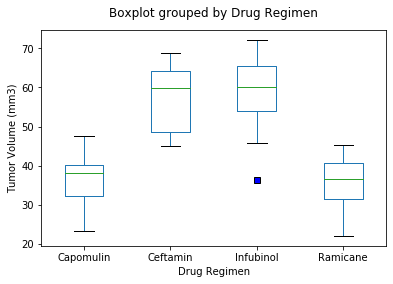

In [186]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

Drug_Table = newtable.loc[(newtable["Drug Regimen"] == "Capomulin")|(newtable["Drug Regimen"] == "Ramicane")|(newtable["Drug Regimen"] == "Ceftamin")|(newtable["Drug Regimen"] == "Infubinol")]
sortby_TimePoint5= Drug_Table.sort_values(by="Timepoint", ascending=False)
pd.to_numeric(sortby_TimePoint5["Timepoint"])
Final_Drug_Table=sortby_TimePoint5.drop_duplicates("Mouse ID")
blue_square = dict(markerfacecolor='b', marker='s')
boxplot=Final_Drug_Table.boxplot(column="Tumor Volume (mm3)",by="Drug Regimen",grid=False,flierprops=blue_square)
boxplot.set_ylabel("Tumor Volume (mm3)")
boxplot.set_title("")
boxplot

## Line and Scatter Plots

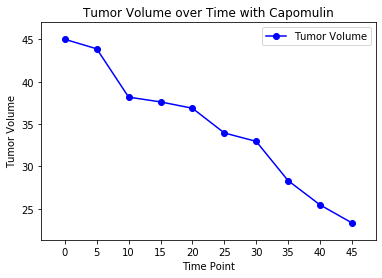

In [67]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#find a mouse ID that is being treated with Capomulin

single_mouse_ID=newtable.loc[combined_file["Drug Regimen"] == "Capomulin", :]["Mouse ID"].values[0]
#Extract values associatd with that specifci mouse ID
Single_mouse_value=newtable.loc[combined_file["Mouse ID"] == single_mouse_ID, :]
#find tumor volume at each timepoint (x,y)
x=Single_mouse_value["Timepoint"].unique()
y=pd.DataFrame(Single_mouse_value.groupby("Timepoint")["Tumor Volume (mm3)"].unique())
y1=y.sort_values(by="Tumor Volume (mm3)",ascending=False)
#plot line graph
TumorVolume_handle, = plt.plot(x, y1, marker ='o', color='blue', label="Tumor Volume")
#format
plt.title("Tumor Volume over Time with Capomulin")
plt.legend(loc="upper right")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.xlim(-0.75, len(x)-0.25)
plt.ylim(min(Single_mouse_value["Tumor Volume (mm3)"])-2,max(Single_mouse_value["Tumor Volume (mm3)"])+2)
plt.show()


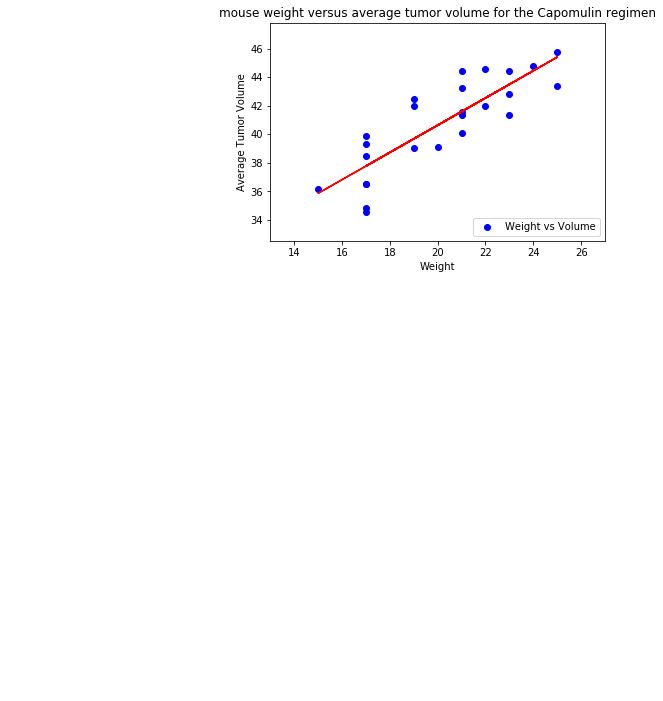

In [81]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#find all mouse who's been treated with Capomulin
only_Capomulin=newtable.loc[combined_file["Drug Regimen"] == "Capomulin", :]

#find mouse weight
weight=only_Capomulin.groupby("Mouse ID")["Weight (g)"].unique()
weight = weight.astype(float)
#find tumor volume
Tumor_volume=only_Capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
#line regresstion
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, Tumor_volume)
regress_values = weight * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plot line and scatter plot

plt.plot(weight,regress_values,"r-")
plt.scatter(weight,Tumor_volume,color="blue", label="Weight vs Volume")
# format
plt.annotate(line_equation,(2,1),fontsize=15,color="red")
plt.title("mouse weight versus average tumor volume for the Capomulin regimen")
plt.legend(loc="lower right")
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume")
plt.xlim(min(weight)-2, max(weight)+2)
plt.ylim(min(Tumor_volume)-2,max(Tumor_volume)+2)
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,Tumor_volume)
print(f"The correlation between weight and average tumor volume is {round(correlation[0],2)}")



The correlation between weight and average tumor volume is 0.84
